<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


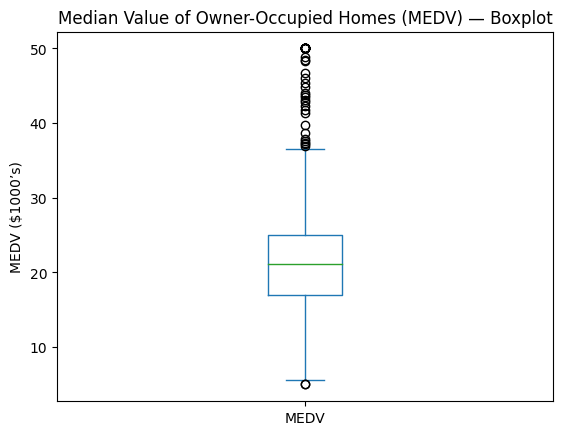

Explanation: The box shows the middle 50% (IQR), the line is the median, and points beyond whiskers are potential outliers.


In [5]:
#BOXPLOT
import matplotlib.pyplot as plt

plt.figure()
boston_df["MEDV"].plot(kind="box")
plt.title("Median Value of Owner-Occupied Homes (MEDV) — Boxplot")
plt.ylabel("MEDV ($1000’s)")
plt.show()

print("Explanation: The box shows the middle 50% (IQR), the line is the median, and points beyond whiskers are potential outliers.")


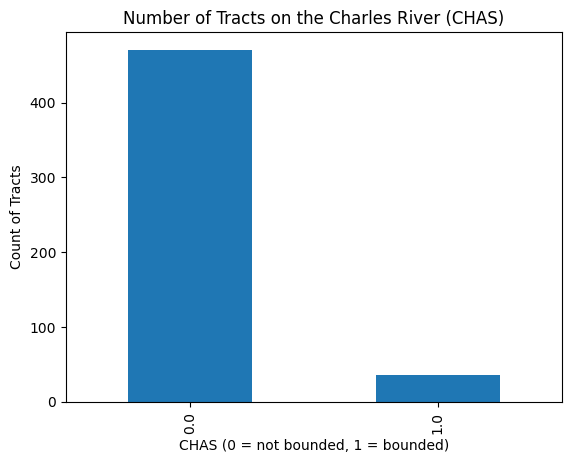

Explanation: This shows how many tracts border the Charles River (CHAS=1) vs do not (CHAS=0).


In [7]:
#TRACTS BAR PLOT
counts = boston_df["CHAS"].value_counts().sort_index()

plt.figure()
counts.plot(kind="bar")
plt.title("Number of Tracts on the Charles River (CHAS)")
plt.xlabel("CHAS (0 = not bounded, 1 = bounded)")
plt.ylabel("Count of Tracts")
plt.show()

print("Explanation: This shows how many tracts border the Charles River (CHAS=1) vs do not (CHAS=0).")


<Figure size 640x480 with 0 Axes>

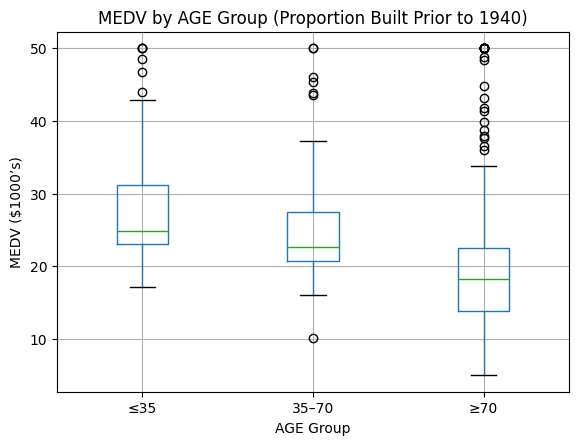

Explanation: Compares home values across neighborhoods with different shares of older housing stock.


In [11]:
#BOXPLOT MEDV VS AGE
age_groups = pd.cut(
    boston_df["AGE"],
    bins=[-np.inf, 35, 70, np.inf],
    labels=["≤35", "35–70", "≥70"]
)

plt.figure()
boston_df.assign(AGE_GROUP=age_groups).boxplot(column="MEDV", by="AGE_GROUP")
plt.title("MEDV by AGE Group (Proportion Built Prior to 1940)")
plt.suptitle("")  # remove default super-title
plt.xlabel("AGE Group")
plt.ylabel("MEDV ($1000’s)")
plt.show()

print("Explanation: Compares home values across neighborhoods with different shares of older housing stock.")

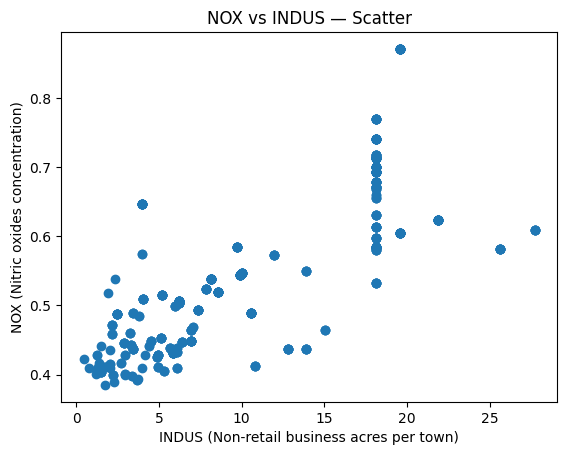

Pearson correlation (NOX vs INDUS): r = 0.764, p = 0.0000
Explanation: Scatter shows direction/strength; Pearson r quantifies linear association (|r| large and p<0.05 → significant).


In [12]:
#NOXScatterPlot
from scipy import stats

plt.figure()
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.title("NOX vs INDUS — Scatter")
plt.xlabel("INDUS (Non-retail business acres per town)")
plt.ylabel("NOX (Nitric oxides concentration)")
plt.show()

r, p = stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])
print(f"Pearson correlation (NOX vs INDUS): r = {r:.3f}, p = {p:.4f}")
print("Explanation: Scatter shows direction/strength; Pearson r quantifies linear association (|r| large and p<0.05 → significant).")


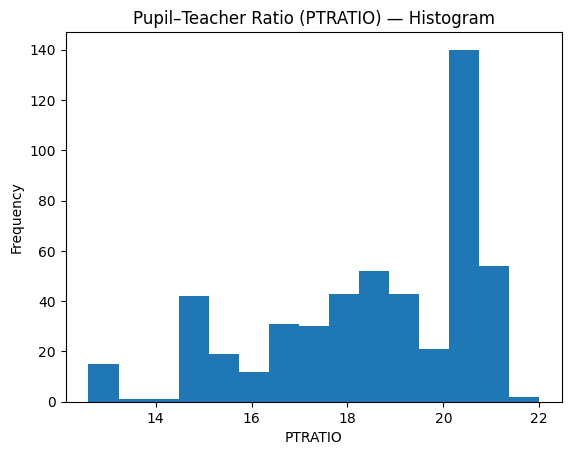

Explanation: Shows distribution of pupil–teacher ratio across tracts and potential skew.


In [13]:
#PTRATIOHISTOGRAM
plt.figure()
plt.hist(boston_df["PTRATIO"], bins=15)
plt.title("Pupil–Teacher Ratio (PTRATIO) — Histogram")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

print("Explanation: Shows distribution of pupil–teacher ratio across tracts and potential skew.")


In [14]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy import stats
import numpy as np

# Hypotheses:
# H0: mean(MEDV | CHAS=1) = mean(MEDV | CHAS=0)
# H1: means differ

medv_0 = boston_df.loc[boston_df["CHAS"]==0, "MEDV"]
medv_1 = boston_df.loc[boston_df["CHAS"]==1, "MEDV"]

# Levene test to decide equal_var
W, p_levene = stats.levene(medv_0, medv_1, center='mean')
equal_var = (p_levene > 0.05)

t_stat, p_val = stats.ttest_ind(medv_1, medv_0, equal_var=equal_var)

print(f"Levene’s test p = {p_levene:.4f} -> equal_var = {equal_var}")
print(f"T-test (two-sided) MEDV by CHAS: t = {t_stat:.3f}, p = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    conclusion = "Reject H0: Significant difference in MEDV between river-bounded and non-bounded tracts."
else:
    conclusion = "Fail to reject H0: No significant evidence of a difference in MEDV by river adjacency."
print(conclusion)

# (Optional) Effect size (Cohen's d)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    sx2, sy2 = np.var(x, ddof=1), np.var(y, ddof=1)
    sp2 = ((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2)
    return (np.mean(x)-np.mean(y)) / np.sqrt(sp2)

d = cohens_d(medv_1, medv_0)
print(f"Cohen’s d = {d:.3f}  (0.2≈small, 0.5≈medium, 0.8≈large)")


Levene’s test p = 0.0032 -> equal_var = False
T-test (two-sided) MEDV by CHAS: t = 3.113, p = 0.0036
Reject H0: Significant difference in MEDV between river-bounded and non-bounded tracts.
Cohen’s d = 0.700  (0.2≈small, 0.5≈medium, 0.8≈large)


In [15]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy import stats

# Hypotheses:
# H0: mean(MEDV_≤35) = mean(MEDV_35–70) = mean(MEDV_≥70)
# H1: At least one group mean differs.

grp = boston_df.assign(AGE_GROUP=age_groups)
g1 = grp.loc[grp["AGE_GROUP"]=="≤35", "MEDV"]
g2 = grp.loc[grp["AGE_GROUP"]=="35–70", "MEDV"]
g3 = grp.loc[grp["AGE_GROUP"]=="≥70", "MEDV"]

F, p = stats.f_oneway(g1, g2, g3)
print(f"ANOVA: F = {F:.3f}, p = {p:.4f}")

alpha = 0.05
if p < alpha:
    print("Reject H0: MEDV differs across AGE groups.")
else:
    print("Fail to reject H0: No significant evidence that MEDV differs across AGE groups.")

# Optional post-hoc if significant
try:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    if p < alpha:
        tukey = pairwise_tukeyhsd(endog=grp["MEDV"], groups=grp["AGE_GROUP"], alpha=0.05)
        print(tukey)
except Exception as e:
    # Tukey requires no missing groups and balanced-ish data; ignore if not available
    pass


ANOVA: F = 36.408, p = 0.0000
Reject H0: MEDV differs across AGE groups.


In [16]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Hypotheses:
# H0: ρ = 0  (no linear relationship)
# H1: ρ ≠ 0

r, p = stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])
print(f"Pearson r = {r:.3f}, p = {p:.4f}")

alpha = 0.05
if p < alpha:
    print("Reject H0: Evidence of a linear relationship between NOX and INDUS.")
else:
    print("Fail to reject H0: No significant linear relationship detected.")


Pearson r = 0.764, p = 0.0000
Reject H0: Evidence of a linear relationship between NOX and INDUS.


In [18]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Hypotheses for slope:
# H0: beta_DIS = 0  (no impact)
# H1: beta_DIS ≠ 0

model = smf.ols("MEDV ~ DIS", data=boston_df).fit()
display(model.summary())

b1 = model.params["DIS"]
ci_low, ci_high = model.conf_int().loc["DIS"]
p = model.pvalues["DIS"]

print(f"Slope for DIS = {b1:.3f} (per +1 unit DIS, MEDV changes by this many $1000’s)")
print(f"95% CI for slope = [{ci_low:.3f}, {ci_high:.3f}],  p = {p:.4f}")

alpha = 0.05
if p < alpha:
    print("Reject H0: DIS has a statistically significant impact on MEDV.")
else:
    print("Fail to reject H0: No statistically significant impact of DIS on MEDV at α = 0.05.")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        22:37:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Slope for DIS = 1.092 (per +1 unit DIS, MEDV changes by this many $1000’s)
95% CI for slope = [0.722, 1.462],  p = 0.0000
Reject H0: DIS has a statistically significant impact on MEDV.
